In [1]:
import pandas as pd
import matplotlib.pyplot as plt
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars.shape[0]

1187

In [5]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.shape[0]

1186

In [6]:
col = ['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?']

star_wars[col[0]].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
star_wars[col[1]].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Series map
http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.map.html

Converting "Yes" or "No" columns to True and False

In [8]:
yes_no = {"Yes":True, "No":False}

star_wars[col[0]] = star_wars[col[0]].map(yes_no)
star_wars[col[0]].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
star_wars[col[1]] = star_wars[col[1]].map(yes_no)
star_wars[col[1]].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [10]:
import numpy as np
movie_liking = {
    "Star Wars: Episode I  The Phantom Menace":True,
    "Star Wars: Episode II  Attack of the Clones":True,
    "Star Wars: Episode III  Revenge of the Sith":True,
    "Star Wars: Episode IV  A New Hope":True,
    "Star Wars: Episode V The Empire Strikes Back":True,
    "Star Wars: Episode VI Return of the Jedi":True,
    np.nan: False
}

mapping_col = star_wars.columns[3:9]
mapping_col

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [11]:
for c in mapping_col:
    star_wars[c] = star_wars[c].map(movie_liking)

In [12]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [13]:
star_wars = star_wars.rename(columns={
    mapping_col[0]:"seen_1",
    mapping_col[1]:"seen_2",
    mapping_col[2]:"seen_3",
    mapping_col[3]:"seen_4",
    mapping_col[4]:"seen_5",
    mapping_col[5]:"seen_6"
})

In [14]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [15]:
rating_cols = star_wars.columns[9:15]

In [16]:
star_wars[rating_cols] = star_wars[rating_cols].astype(float)
star_wars[rating_cols].head(2)

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
star_wars = star_wars.rename(columns={
    rating_cols[0]:"rank_1",
    rating_cols[1]:"rank_2",
    rating_cols[2]:"rank_3",
    rating_cols[3]:"rank_4",
    rating_cols[4]:"rank_5",
    rating_cols[5]:"rank_6"
})

In [18]:
star_wars[star_wars.columns[9:15]].head(3)

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0


In [19]:
ranking_mean = star_wars[star_wars.columns[9:16]].mean()

In [20]:
ranking_mean.head(9)

rank_1    3.732934
rank_2    4.087321
rank_3    4.341317
rank_4    3.272727
rank_5    2.513158
rank_6    3.047847
dtype: float64

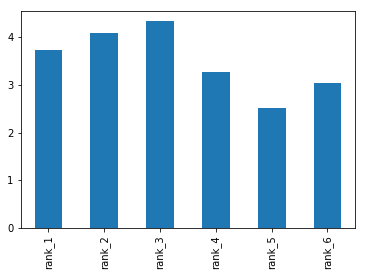

In [21]:
%matplotlib inline
ranking_mean.plot.bar()

Looks like the movie 3 is the least ranked/liked movie. Where as movie 5 is the most ranked movie

In [22]:
movie_seen = star_wars[star_wars.columns[3:9]].sum()
movie_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

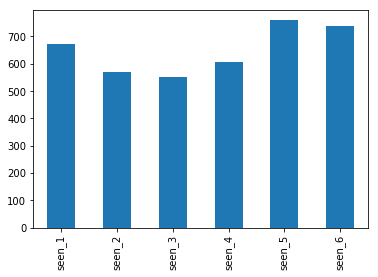

In [23]:
movie_seen.plot.bar()

Looks like movie 5 is seen the most and movie 3 is seen the least.

In [24]:
def grouping_seen_rank(col_name):
    fig, ax = plt.subplots(figsize=(10,6))
    grouped = star_wars.groupby(col_name)
    grouped[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].agg(np.sum).sort_index().plot.bar(title="Count of movies seen.", ax=ax)
    plt.legend(loc='upper center')
    #ax.set_ylim(0,600)
    fig1, ax1 = plt.subplots(figsize=(10,6))
    grouped[['rank_1','rank_2','rank_3','rank_4','rank_5','rank_6']].agg(np.mean).sort_index().plot.bar(title="Mean for rank of movies.", ax=ax1)
    plt.legend(loc='upper center')
    ax1.set_ylim(0,6)
    plt.show()

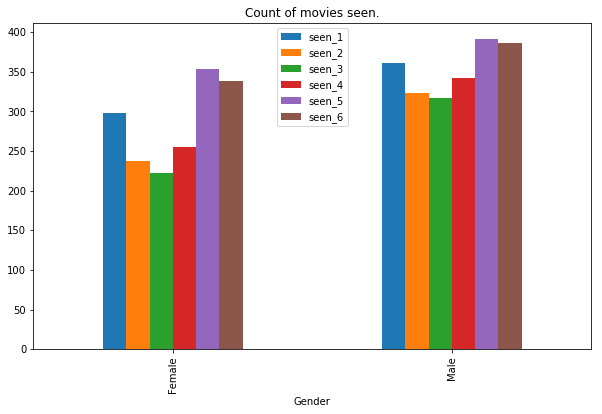

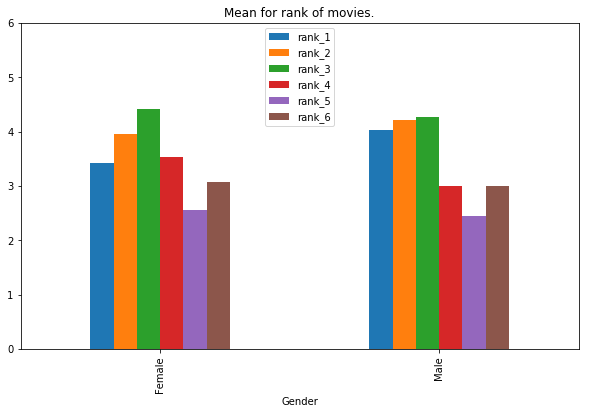

In [25]:
grouping_seen_rank('Gender')

In [26]:
star_wars['Gender'].value_counts()

Female    549
Male      497
Name: Gender, dtype: int64

##### GENDER
More male have seen the star wars movies.
But male liked movie 1,2,3 far less. 

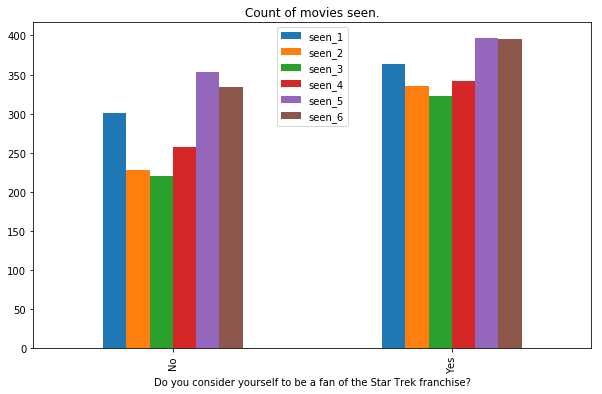

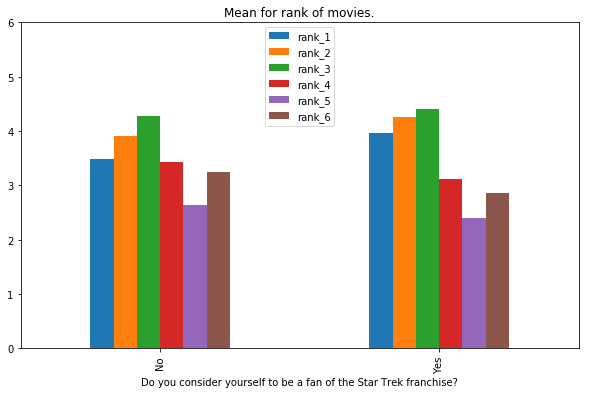

In [27]:
grouping_seen_rank("Do you consider yourself to be a fan of the Star Trek franchise?")

#### Star Trek Fan
People who are fan of star trek have seen Star wars more.
But they also dislike the movie 1,2,3 more and like 4,5,6 more.

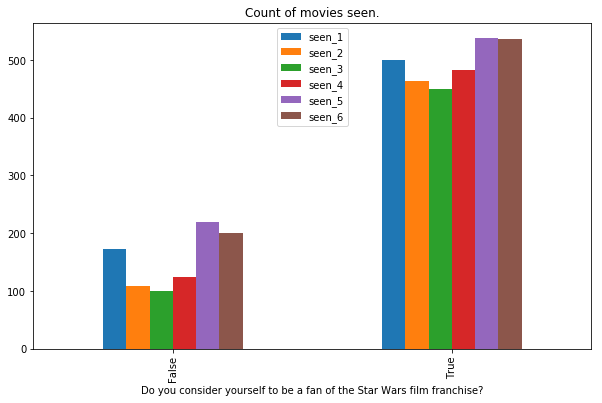

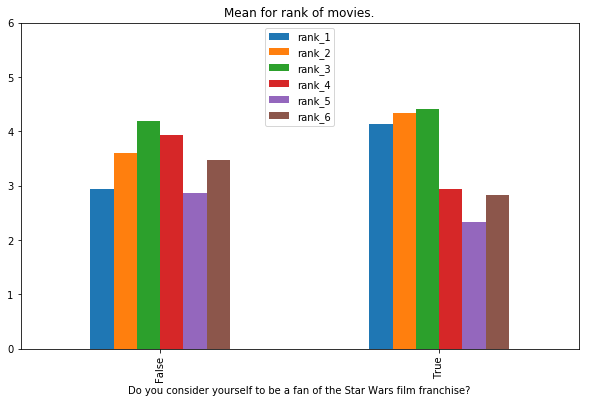

In [28]:
grouping_seen_rank("Do you consider yourself to be a fan of the Star Wars film franchise?")

#### Fan
Obviously a fan has seen all the movies way more in comparison to non-fan Ranking for movie 4,5,6 are lower (like) for fans than for non fan. Ranking for movie 1,2,3 ar higher (dislike) for fans than for non fan.

### Are you familiar with the Expanded Universe?

In [29]:
expanded_uni_col = 'Are you familiar with the Expanded Universe?'
star_wars[expanded_uni_col] = star_wars[expanded_uni_col].map(yes_no)

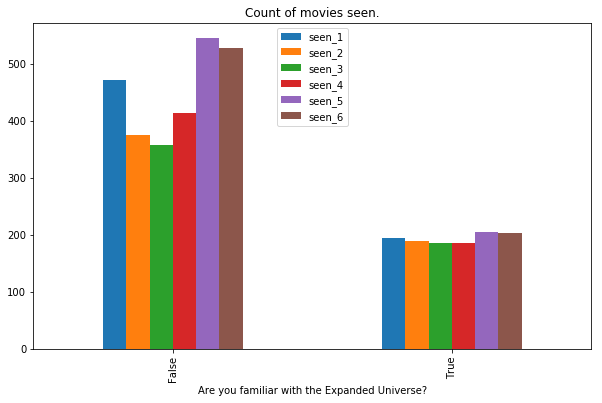

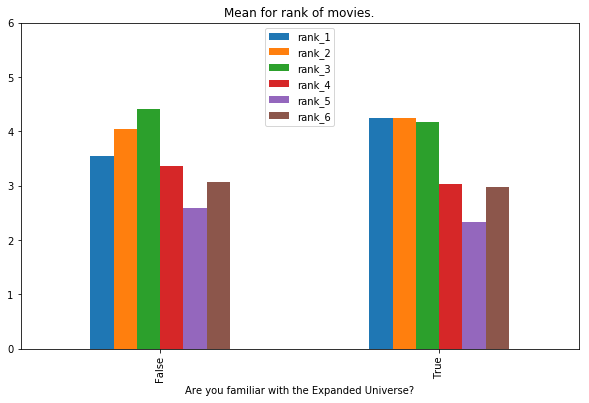

In [30]:
grouping_seen_rank(expanded_uni_col)

In [31]:
star_wars[expanded_uni_col].value_counts()

False    615
True     213
Name: Are you familiar with the Expanded Universe?, dtype: int64

#### Expanded universe
Looks like people which know have seen the movies less, but this data is a bit biased as we see from the value counts.

#### AGE

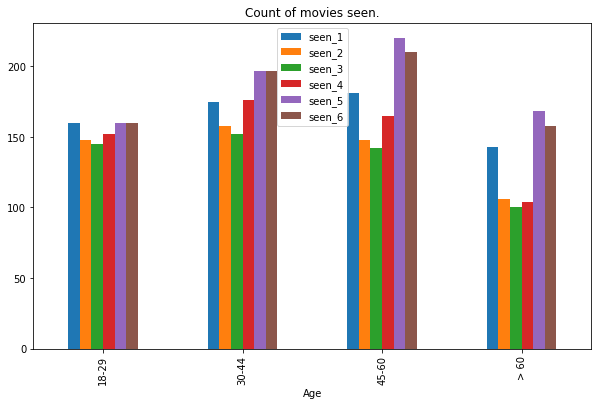

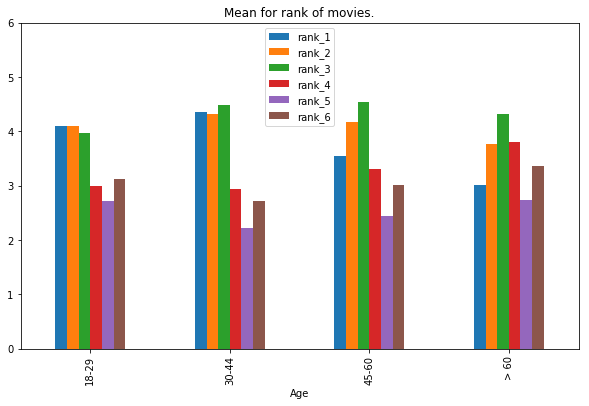

In [32]:
grouping_seen_rank('Age')

In [33]:
star_wars['Age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64

Looks like people between age 45 and 60 have seen more movies from star wars. Specially thinking movie 4 was released in "May 25, 1977".

#### House Hold income

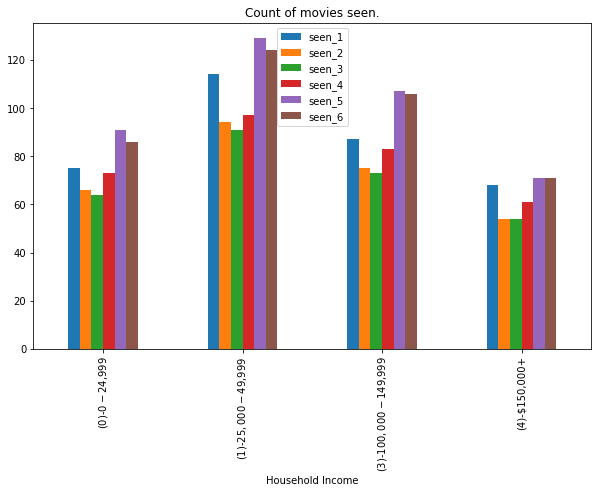

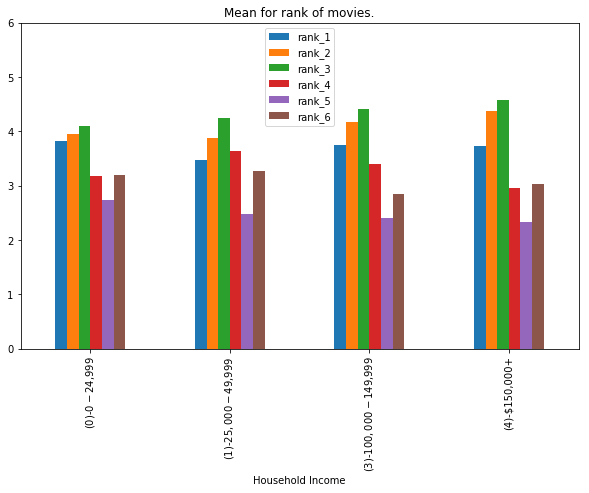

In [34]:
house_hold_income_group = {
    "$0 - $24,999":"(0)-$0-$24,999",
    "$25,000 - $49,999":"(1)-$25,000-$49,999",
    "$50,000 - $99,9999":"(2)-$50,000-$99,999",
    "$100,000 - $149,999":"(3)-$100,000 - $149,999",
    "$150,000+":"(4)-$150,000+"
}

star_wars['Household Income'] = star_wars['Household Income'].map(house_hold_income_group)

grouping_seen_rank('Household Income')

In [35]:
star_wars['Household Income'].value_counts()

(1)-$25,000-$49,999        186
(3)-$100,000 - $149,999    141
(0)-$0-$24,999             138
(4)-$150,000+               95
Name: Household Income, dtype: int64

People in the group of 25K to 50K have seen mos movies.
People have a high rank (disliked) in group 0K-25K

#### Education

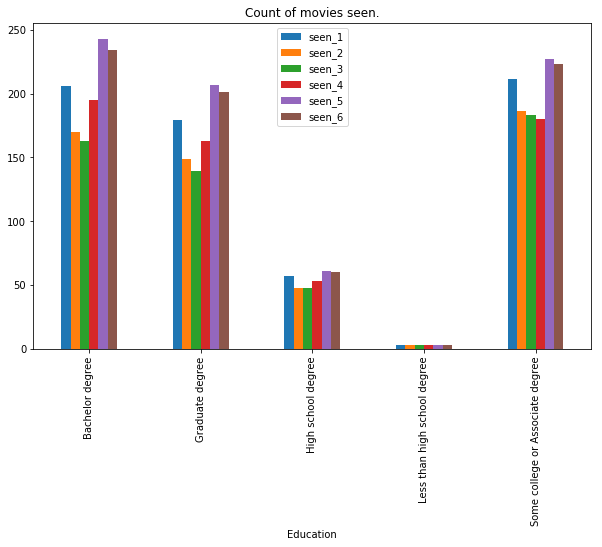

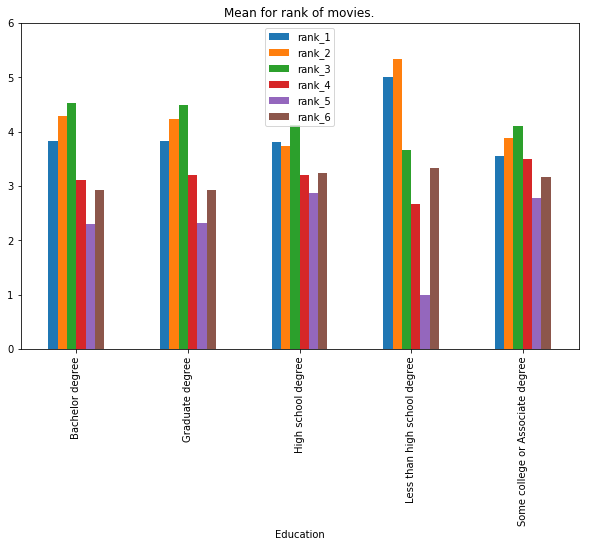

In [36]:
grouping_seen_rank('Education')

In [37]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

Looking at "Less than high school degree" does not make sense as there are very few participants there.
High school degree rankers have seen the move less. 
Where as most movie is seen by "Bachelor degree" or "Some college or Associate degree" holder.

#### Location (Census Region)

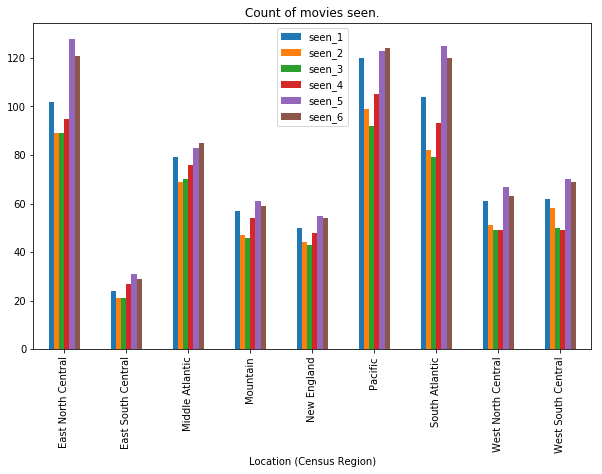

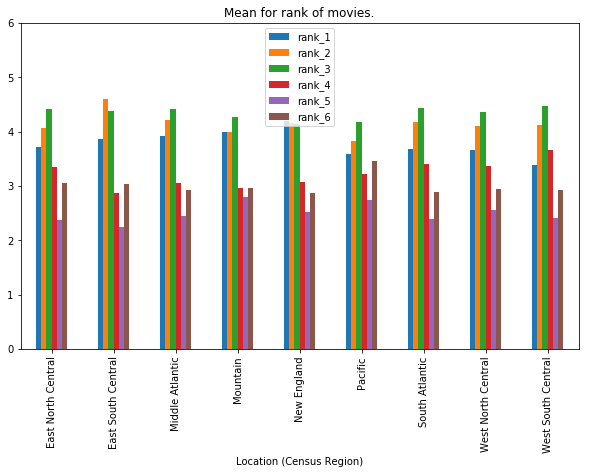

In [38]:
grouping_seen_rank('Location (Census Region)')

In [39]:
star_wars['Location (Census Region)'].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

### Characeters Favoring

In [40]:
character_cols = star_wars.columns[15:29]

In [41]:
favor_dict = {
    "Unfamiliar (N/A)":"0-unfamilar",
    "Very unfavorably":"1-very-unfavorable",
    "Somewhat unfavorably":"2-somewhat-unfavorable",
    "Neither favorably nor unfavorably (neutral)":"3-neutral",
    "Somewhat favorably":"4-somewhat-favorably",
    "Very favorably":"5-very-favorably"
}

for c in character_cols:
    star_wars[c] = star_wars[c].map(favor_dict)
    
star_wars = star_wars.rename(columns={
    character_cols[0]:"Han Solo",
    character_cols[1]:"Luke Skywalker",
    character_cols[2]:"Princess Leia Organa",
    character_cols[3]:"Anakin Skywalker",
    character_cols[4]:"Obi Wan Kenobi",
    character_cols[5]:"Emperor Palpatine",
    character_cols[6]:"Darth Vader",
    character_cols[7]:"Lando Calrissian",
    character_cols[8]:"Boba Fett",
    character_cols[9]:"C-3P0",
    character_cols[10]:"R2 D2",
    character_cols[11]:"Jar Jar Binks",
    character_cols[12]:"Padme Amidala",
    character_cols[13]:"Yoda"        
})

In [42]:
star_wars[star_wars.columns[15:29]].head(4)

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,5-very-favorably,5-very-favorably,5-very-favorably,5-very-favorably,5-very-favorably,5-very-favorably,5-very-favorably,0-unfamilar,0-unfamilar,5-very-favorably,5-very-favorably,5-very-favorably,5-very-favorably,5-very-favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4-somewhat-favorably,4-somewhat-favorably,4-somewhat-favorably,4-somewhat-favorably,4-somewhat-favorably,0-unfamilar,0-unfamilar,0-unfamilar,0-unfamilar,0-unfamilar,0-unfamilar,0-unfamilar,0-unfamilar,0-unfamilar
4,5-very-favorably,5-very-favorably,5-very-favorably,5-very-favorably,5-very-favorably,4-somewhat-favorably,5-very-favorably,4-somewhat-favorably,2-somewhat-unfavorable,5-very-favorably,5-very-favorably,5-very-favorably,5-very-favorably,5-very-favorably


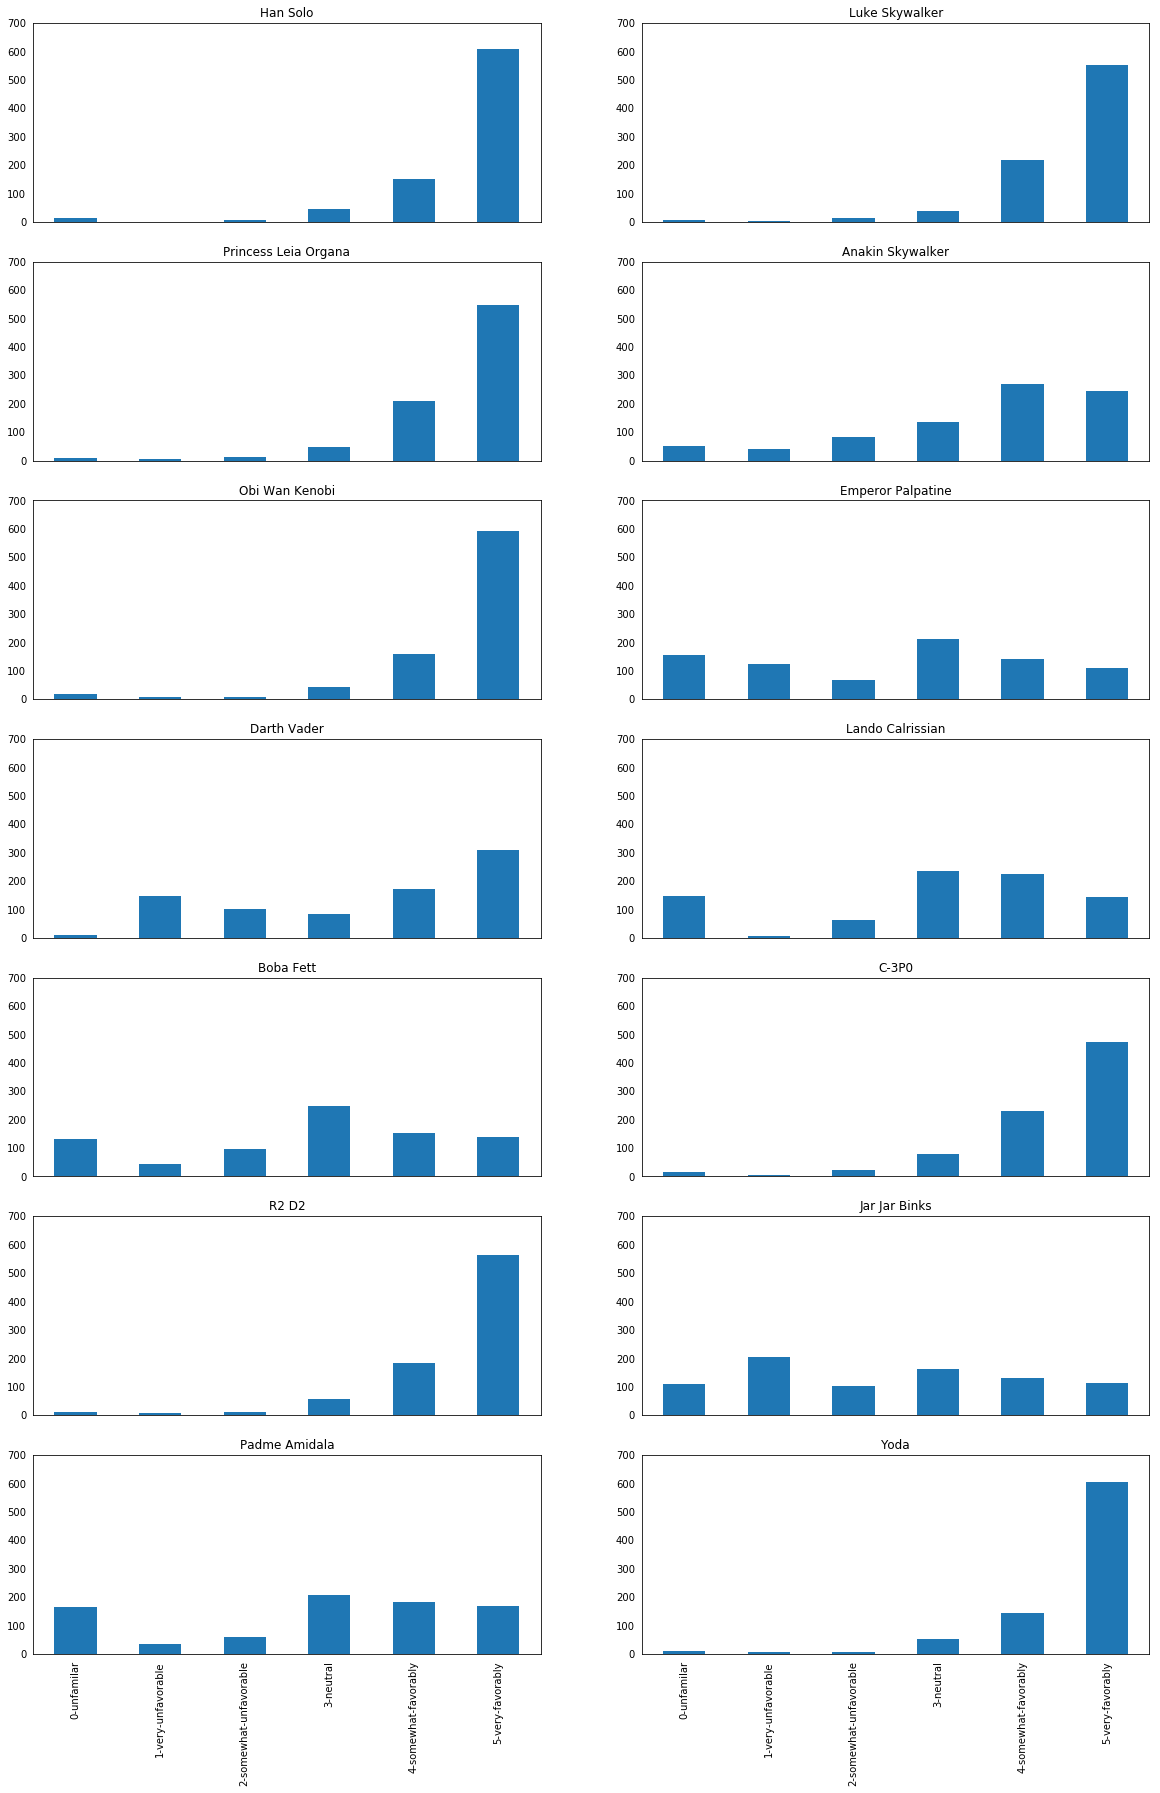

In [43]:
fig = plt.figure(figsize=(20,30))
for i in range(15,29):
    ax = fig.add_subplot(7,2,i-14)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.set_ylim(0,700)
    if i < 27:
        ax.get_xaxis().set_visible(False)
    star_wars[star_wars.columns[i]].value_counts().sort_index().plot.bar(title=star_wars.columns[i], ax=ax)
    
plt.show()

### Liked characters:
Most liked characters in star wars are "Hans Solo", "Sky Walker", "Prience Lila", "Yoda"

Most controversial is "Darth Vader" and "Lando Calrissian"